In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data= pd.read_csv('train_indessa.csv')
etr=data
etr.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [2]:
# Create correlation matrix
corr_matrix = etr.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['funded_amnt', 'funded_amnt_inv']

In [3]:
etr=pd.read_csv('train_indessa.csv',na_values=[" "])


In [4]:
etr.drop(['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)
etr.head()

,member_id,loan_amnt,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,36 months,NaN,19.19,E,E3,clerk,9 years,OWN,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [5]:
etr.columns

Index(['member_id', 'loan_amnt', 'term', 'batch_enrolled', 'int_rate', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status'],
      dtype='object')

In [6]:
cat=pd.DataFrame()
num=pd.DataFrame()
emp=pd.DataFrame()

In [7]:
num['loan_amnt']=etr['loan_amnt']
num['loan_amnt'].value_counts().unique()


array([37175, 30126, 28420, 28196, 21728, 16661, 16285, 15631, 14433,
       14216, 13457, 13326, 10608,  8866,  8591,  7977,  7256,  6722,
        6258,  5818,  4594,  4500,  4122,  3916,  3465,  3387,  3284,
        3207,  3055,  2588,  2549,  2518,  2290,  2086,  2012,  2008,
        1968,  1947,  1944,  1884,  1805,  1708,  1685,  1672,  1639,
        1587,  1570,  1547,  1510,  1506,  1432,  1378,  1342,  1244,
        1207,  1169,  1134,  1115,  1108,  1030,  1019,   970,   937,
         933,   930,   886,   804,   785,   778,   777,   745,   723,
         691,   679,   650,   644,   629,   625,   616,   609,   608,
         581,   575,   555,   539,   534,   531,   490,   484,   483,
         481,   478,   453,   451,   449,   437,   435,   430,   412,
         404,   402,   389,   383,   379,   377,   374,   371,   365,
         362,   361,   358,   355,   347,   341,   337,   335,   334,
         331,   329,   325,   322,   321,   315,   311,   309,   308,
         305,   301,

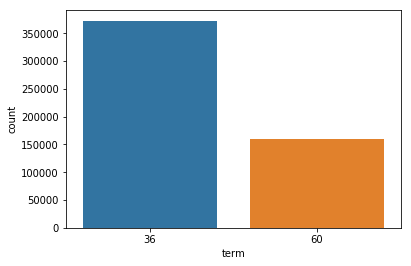

In [8]:
cat['term']=etr['term']
cat['term'] = cat['term'].apply(str).apply(lambda x: (x.split(' ')[0]))
sns.countplot(x=cat['term'],data=cat)
plt.show()


In [9]:
num['int_rate']=etr['int_rate']
num['int_rate'].value_counts().unique()

array([20609, 15436, 15207, 13054, 12219, 11332, 11317, 11233, 11083,
       10754, 10614, 10516,  9747,  9700,  9371,  8963,  6895,  6866,
        6638,  6412,  6391,  6330,  6129,  6062,  5877,  5871,  5751,
        5744,  5658,  5346,  5116,  4954,  4709,  4393,  4378,  4343,
        4316,  4165,  4070,  3992,  3955,  3819,  3725,  3607,  3432,
        3374,  3318,  3289,  3077,  2983,  2901,  2858,  2804,  2774,
        2689,  2622,  2599,  2593,  2566,  2564,  2560,  2548,  2540,
        2515,  2497,  2376,  2327,  2253,  2172,  2165,  2155,  2153,
        2084,  2025,  1943,  1936,  1886,  1884,  1809,  1806,  1802,
        1769,  1723,  1673,  1632,  1616,  1560,  1553,  1543,  1513,
        1506,  1501,  1488,  1482,  1460,  1421,  1391,  1381,  1343,
        1293,  1267,  1249,  1248,  1246,  1232,  1212,  1204,  1195,
        1194,  1192,  1145,  1136,  1133,  1122,  1110,  1101,  1078,
        1066,  1057,  1056,   999,   990,   931,   912,   909,   908,
         896,   874,

In [10]:
cat['grade']=etr['grade']
cat['grade'].value_counts().unique()

array([152713, 147499,  89107,  83567,  42495,  13826,   3221],
      dtype=int64)

In [11]:
# NEW Dataframe for employee_length
emp['emp_length']=etr['emp_length']
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"nan": 0
}
}
emp = emp.replace(mapping_dict)
emp.head()
# filtered_loans[['emp_length','grade']].head()

,emp_length
0,9.0
1,0.0
2,2.0
3,10.0
4,10.0


In [12]:
emp.fillna(value=0,inplace=True)
emp.isnull().sum()

emp_length    0
dtype: int64

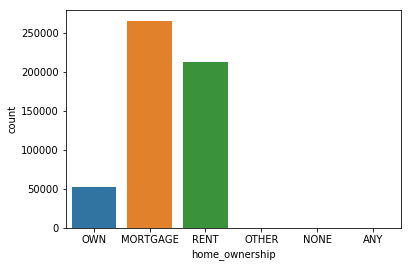

In [13]:
cat['home_ownership']=etr['home_ownership']
cat['home_ownership'].value_counts()
sns.countplot(x=cat['home_ownership'],data=cat)
plt.show()

In [14]:
num['annual_inc']=etr['annual_inc']
num['annual_inc'].fillna(num['annual_inc'].mean(),inplace=True)
# num['annual_inc'].isnull().sum()
# sns.countplot(x=num['annual_inc'],data=num)
# plt.show()

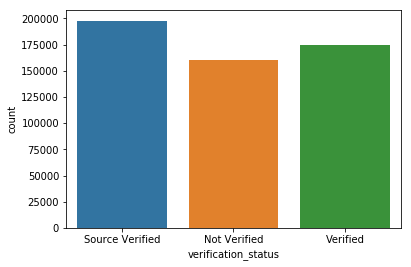

In [15]:
cat['verification_status']=etr['verification_status']
cat['verification_status'].value_counts()
sns.countplot(x=cat['verification_status'],data=cat)
plt.show()

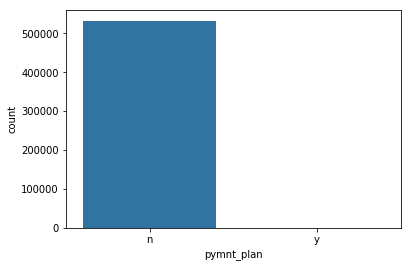

In [16]:
cat['pymnt_plan']=etr['pymnt_plan']
cat['pymnt_plan'].isnull().sum()
sns.countplot(x=cat['pymnt_plan'],data=cat)
plt.show()

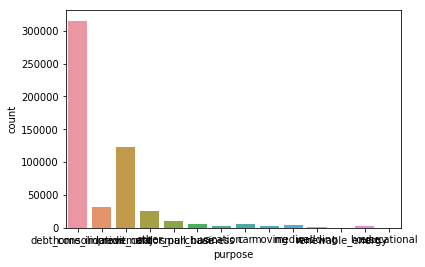

In [17]:
cat['purpose']=etr['purpose']
cat['purpose'].value_counts()
sns.countplot(x=cat['purpose'],data=cat)
plt.show()

In [18]:
cat['addr_state']=etr['addr_state']
cat['addr_state'].isnull().sum()

0

In [19]:
cat['dti']=etr['dti']
# cat['dti'].isnull().sum()

In [20]:
cat['delinq_2yrs']=etr['delinq_2yrs']
cat['delinq_2yrs'].fillna(value=0,inplace=True)
cat['delinq_2yrs'].isnull().sum()

0

In [21]:
num['open_acc']=etr['open_acc']
num['open_acc'].fillna(num['open_acc'].mean(),inplace=True)
# cat['open_acc'].value_counts()

In [23]:
cat['pub_rec']=etr['pub_rec']
cat['pub_rec'].value_counts()
cat['pub_rec'].fillna(value=0,inplace=True)


In [24]:
cat['revol_bal']=etr['revol_bal']
# cat['revol_bal'].value_counts()

In [25]:
num['revol_util']=etr['revol_util']
num['revol_util'].fillna(num['revol_util'].mean(),inplace=True)


In [26]:
num['total_acc']=etr['total_acc']
num['total_acc'].fillna(num['total_acc'].mean(),inplace=True)

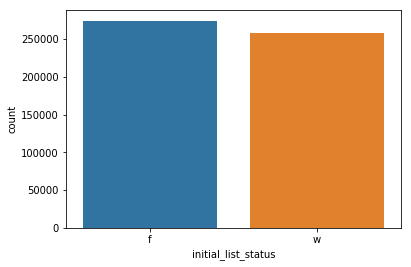

In [27]:
cat['initial_list_status']=etr['initial_list_status']
sns.countplot(x=cat['initial_list_status'],data=cat)
plt.show()

In [28]:
cat['total_rec_int']=etr['total_rec_int']

In [29]:
cat['total_rec_late_fee']=etr['total_rec_late_fee']

In [30]:
cat['recoveries']=etr['recoveries']

In [31]:
cat['collection_recovery_fee']=etr['collection_recovery_fee']

In [32]:
etr['collections_12_mths_ex_med'].fillna(value=0,inplace=True)
cat['collections_12_mths_ex_med']=etr['collections_12_mths_ex_med']


In [33]:
etr['mths_since_last_major_derog'].isnull().sum()

399448

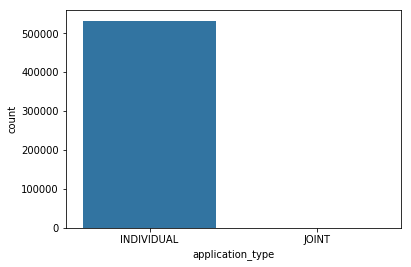

In [34]:
cat['application_type']=etr['application_type']
sns.countplot(x=cat['application_type'],data=cat)
plt.show()

In [35]:
etr['verification_status_joint'].isnull().sum()

532123

In [36]:
num['last_week_pay']=etr['last_week_pay']
num['last_week_pay'] = num['last_week_pay'].apply(str).apply(lambda x: (x.split(' ')[0]))
num['last_week_pay'] = num['last_week_pay'].apply(str).apply(lambda x: (x.split('th')[0]))
# num['last_week_pay'].value_counts().unique()

In [37]:
cat['acc_now_delinq']=etr['acc_now_delinq']
cat['acc_now_delinq'].fillna(value=0,inplace=True)


In [38]:
etr['tot_coll_amt'].isnull().sum()

42004

In [39]:
num['tot_coll_amt']=etr['tot_coll_amt']

In [40]:
num['loan_status']=etr['loan_status']


In [41]:
final = pd.concat([num, 
                        cat,emp] 
                        ,axis=1)



In [42]:
final=final.dropna(axis=0,subset=['tot_coll_amt'])


In [43]:

y=final['loan_status']


In [44]:
final.drop('loan_status',axis=1,inplace=True)

In [45]:
final.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'revol_util',
       'total_acc', 'last_week_pay', 'tot_coll_amt', 'term', 'grade',
       'home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'pub_rec', 'revol_bal',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'emp_length'],
      dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()


final.grade=le.fit_transform(final.grade)

final.initial_list_status=le.fit_transform(final.initial_list_status)
final.application_type=le.fit_transform(final.application_type)
final.home_ownership=le.fit_transform(final.home_ownership)
final.verification_status=le.fit_transform(final.verification_status)
final.purpose=le.fit_transform(final.purpose)

final.pymnt_plan=le.fit_transform(final.pymnt_plan)
final.addr_state=le.fit_transform(final.addr_state)
final.initial_list_status=le.fit_transform(final.initial_list_status)
final.term=le.fit_transform(final.term)



In [47]:
# final['last_week_pay'].astype(float)
# print(final['last_week_pay'].dtype)
# final['last_week_pay'].value_counts()
final.drop('last_week_pay',axis=1,inplace=True)

In [48]:
final.shape

(490424, 27)

C:\Users\ASHU\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


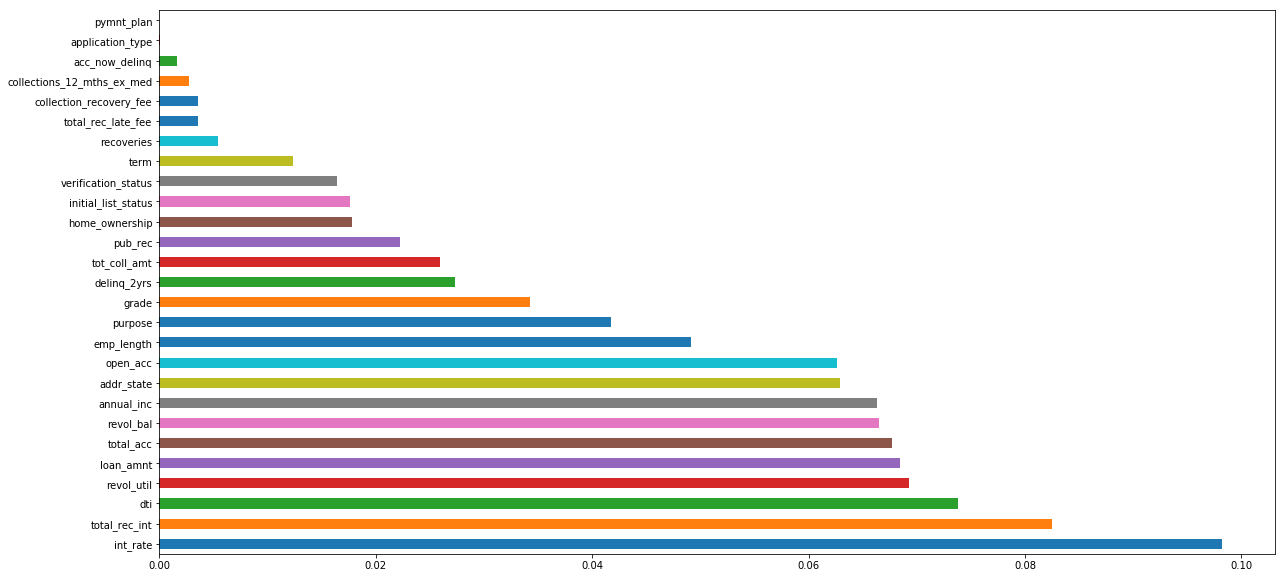

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

etr=ExtraTreesClassifier()
etr.fit(final,y)
plt.figure(figsize=(20,10))
feat_importances=pd.Series(etr.feature_importances_,index=final.columns).sort_values(ascending=False)
feat_importances.nlargest(27).plot(kind='barh')

In [50]:
final.drop(['recoveries','total_rec_late_fee','collections_12_mths_ex_med','collection_recovery_fee','acc_now_delinq','application_type','pymnt_plan'],axis=1,inplace=True)

In [51]:
final.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'revol_util',
       'total_acc', 'tot_coll_amt', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'pub_rec', 'revol_bal', 'initial_list_status', 'total_rec_int',
       'emp_length'],
      dtype='object')

In [54]:
final.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'revol_util',
       'total_acc', 'tot_coll_amt', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'pub_rec', 'revol_bal', 'initial_list_status', 'total_rec_int',
       'emp_length'],
      dtype='object')

In [130]:
final_grade_one_hot = pd.get_dummies(final['grade'], 
                                     prefix='grade')
final_grade_one_hot.head()

,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0


In [131]:
final_home_one_hot = pd.get_dummies(final['home_ownership'], 
                                     prefix='home_ownership')
final_home_one_hot.head()


,home_ownership_0,home_ownership_1,home_ownership_2,home_ownership_3,home_ownership_4,home_ownership_5
0,0,0,0,0,1,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [132]:
final_status_one_hot = pd.get_dummies(final['verification_status'], 
                                     prefix='verification_status')
final_status_one_hot.head()

,verification_status_0,verification_status_1,verification_status_2
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,1


In [133]:
new_final = pd.concat([final,final_grade_one_hot,final_home_one_hot,final_status_one_hot,
                 ] 
                        ,axis=1)
new_final.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'revol_util',
       'total_acc', 'tot_coll_amt', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'pub_rec', 'revol_bal', 'initial_list_status', 'total_rec_int',
       'emp_length', 'grade_0', 'grade_1', 'grade_2', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'home_ownership_0', 'home_ownership_1',
       'home_ownership_2', 'home_ownership_3', 'home_ownership_4',
       'home_ownership_5', 'verification_status_0', 'verification_status_1',
       'verification_status_2'],
      dtype='object')

In [134]:
new_final.shape

(490424, 36)

In [135]:
new_final=pd.concat([new_final,y],axis=1)


In [136]:
new_final.shape

(490424, 37)

# Removing outliers

In [137]:
new_final.drop(new_final[new_final['annual_inc']>8000000].index,inplace=True)

In [138]:
new_final.drop(new_final[new_final['revol_util']>800].index,inplace=True)

In [139]:
new_final.drop(new_final[new_final['tot_coll_amt']>400000].index,inplace=True)

In [140]:
new_final.drop(new_final[new_final['dti']>300].index,inplace=True)

In [141]:
new_final.drop(new_final[new_final['pub_rec']>60].index,inplace=True)

In [142]:
new_final.drop(new_final[new_final['revol_bal']>1500000].index,inplace=True)

In [143]:
y=new_final['loan_status']


In [144]:
new_final.drop('loan_status',axis=1,inplace=True)

In [145]:
new_final.shape

(490409, 36)

# ALGOS

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_final,y,test_size=0.20)


In [147]:
X_dev,X_ftest,y_dev,y_ftest=train_test_split(X_test,y_test,test_size=0.50)


In [148]:
from sklearn.preprocessing import StandardScaler
X_dev_n=StandardScaler().fit_transform(X_dev)
X_new_dev=pd.DataFrame(X_dev_n,columns=X_dev.columns)

X_te_n=StandardScaler().fit_transform(X_ftest)
X_new_test=pd.DataFrame(X_te_n,columns=X_ftest.columns)


X_tr_n=StandardScaler().fit_transform(X_train)
X_new_train=pd.DataFrame(X_tr_n,columns=X_train.columns)





In [149]:
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
def fit_ml_algo(algo,X_train,y_train,cv):
    # first pass
    model=algo.fit(X_train,y_train)
    acc=round(model.score(X_train,y_train)*100,2)
    
    # Cross Validation
    train_pred=model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
    
    #Cross validation accuracy matrix
    
    acc_cv=round(metrics.accuracy_score(y_train,train_pred)*100,2)
    return train_pred,acc,acc_cv

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost

import warnings
warnings.filterwarnings('ignore')

In [151]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_new_dev, 
                                                               y_dev, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 81.61
Accuracy CV 10-Fold: 81.59


In [83]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(DecisionTreeClassifier(), 
                                                               X_new_dev, 
                                                               y_dev, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


Accuracy: 100.0
Accuracy CV 10-Fold: 73.19


In [152]:
model=GradientBoostingClassifier(n_estimators=150)
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(model, 
                                                               X_new_dev, 
                                                               y_dev, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 82.06
Accuracy CV 10-Fold: 81.81


In [154]:
model.fit(X_new_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [155]:
predictions=model.predict(X_new_test)
print('acc is',metrics.accuracy_score(predictions,y_ftest))

acc is 0.8132175118778165


# Test Data

In [85]:
test=pd.read_csv('test_indessa.csv',na_values=[" "])
test.head()
new_test=pd.DataFrame(columns=final.columns)
new_test=test[final.columns]
new_test.head()


,loan_amnt,int_rate,annual_inc,open_acc,revol_util,total_acc,tot_coll_amt,term,grade,home_ownership,verification_status,purpose,addr_state,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_rec_int,emp_length
0,14000,16.24,73500.0,16.0,65.3,53.0,0.0,60 months,C,RENT,Source Verified,credit_card,OH,28.65,1.0,0.0,29828,f,3915.61,4 years
1,16000,9.49,105000.0,8.0,19.4,63.0,0.0,60 months,B,MORTGAGE,Source Verified,major_purchase,NC,31.19,0.0,0.0,4161,w,1495.06,5 years
2,11050,15.61,62300.0,11.0,74.0,20.0,0.0,60 months,D,RENT,Not Verified,debt_consolidation,KS,21.73,1.0,1.0,12064,w,2096.21,10+ years
3,35000,12.69,150000.0,21.0,45.0,26.0,0.0,60 months,C,OWN,Source Verified,debt_consolidation,CA,17.27,0.0,0.0,32549,f,1756.31,10+ years
4,6500,6.89,52000.0,16.0,19.2,36.0,0.0,36 months,A,MORTGAGE,Not Verified,major_purchase,LA,20.19,0.0,0.0,5133,w,172.21,5 years


In [86]:
new_test['annual_inc'].isnull().sum()
new_test['annual_inc'].fillna(new_test['annual_inc'].mean(),inplace=True)

In [87]:
new_test['open_acc'].isnull().sum()
new_test['open_acc'].fillna(new_test['open_acc'].mean(),inplace=True)

In [88]:
new_test['revol_util'].isnull().sum()
new_test['revol_util'].fillna(new_test['revol_util'].mean(),inplace=True)

In [89]:
new_test['total_acc'].isnull().sum()
new_test['total_acc'].fillna(new_test['total_acc'].mean(),inplace=True)

In [90]:
new_test['tot_coll_amt'].isnull().sum()
new_test['tot_coll_amt'].fillna(value=0,inplace=True)

In [91]:
new_test['delinq_2yrs'].fillna(value=0,inplace=True)

In [92]:
new_test['pub_rec'].isnull().sum()
new_test['pub_rec'].fillna(value=0,inplace=True)

In [93]:
new=pd.DataFrame()

In [94]:
new['emp_length']=new_test['emp_length']
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"nan": 0
}
}
new = new.replace(mapping_dict)
new.head()

,emp_length
0,4.0
1,5.0
2,10.0
3,10.0
4,5.0


In [95]:
new.fillna(value=0,inplace=True)
new.isnull().sum()

emp_length    0
dtype: int64

In [96]:
new_test['term'] = new_test['term'].apply(str).apply(lambda x: (x.split(' ')[0]))

In [97]:
from sklearn.preprocessing import LabelEncoder

le1=LabelEncoder()


new_test.grade=le1.fit_transform(new_test.grade)
new_test.home_ownership=le1.fit_transform(new_test.home_ownership)
new_test.verification_status=le1.fit_transform(new_test.verification_status)
new_test.purpose=le1.fit_transform(new_test.purpose)

new_test.addr_state=le1.fit_transform(new_test.addr_state)
new_test.initial_list_status=le1.fit_transform(new_test.initial_list_status)
new_test.term=le1.fit_transform(new_test.term)

In [98]:
new_test.head()

,loan_amnt,int_rate,annual_inc,open_acc,revol_util,total_acc,tot_coll_amt,term,grade,home_ownership,verification_status,purpose,addr_state,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_rec_int,emp_length
0,14000,16.24,73500.0,16.0,65.3,53.0,0.0,1,2,4,1,1,35,28.65,1.0,0.0,29828,0,3915.61,4 years
1,16000,9.49,105000.0,8.0,19.4,63.0,0.0,1,1,0,1,6,27,31.19,0.0,0.0,4161,1,1495.06,5 years
2,11050,15.61,62300.0,11.0,74.0,20.0,0.0,1,3,4,0,2,16,21.73,1.0,1.0,12064,1,2096.21,10+ years
3,35000,12.69,150000.0,21.0,45.0,26.0,0.0,1,2,3,1,2,4,17.27,0.0,0.0,32549,0,1756.31,10+ years
4,6500,6.89,52000.0,16.0,19.2,36.0,0.0,0,0,0,0,6,18,20.19,0.0,0.0,5133,1,172.21,5 years


In [103]:
new_test['emp_length']=new['emp_length']

In [122]:
test_grade_one_hot = pd.get_dummies(new_test['grade'], 
                                     prefix='grade')
test_grade_one_hot.head()

,grade_0,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0


In [123]:
test_home_one_hot = pd.get_dummies(new_test['home_ownership'], 
                                     prefix='home_ownership')
test_home_one_hot.head()

,home_ownership_0,home_ownership_1,home_ownership_2,home_ownership_3,home_ownership_4
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,1,0,0,0,0


In [124]:
test_status_one_hot = pd.get_dummies(new_test['verification_status'], 
                                     prefix='verification_status')
test_status_one_hot.head()

,verification_status_0,verification_status_1,verification_status_2
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [128]:
abc = pd.concat([new_test,
                 
                 test_grade_one_hot,test_home_one_hot,test_status_one_hot,
                 ] 
                        ,axis=1)
# dragon.shape
abc.shape

(354951, 35)

In [129]:
from sklearn.preprocessing import StandardScaler
abc_n=StandardScaler().fit_transform(abc)
dragon=pd.DataFrame(abc_n,columns=abc.columns)

In [112]:
dragon.shape

(354951, 20)

In [153]:
dragon['home_ownership_5']=0
dragon.shape

(354951, 36)

In [152]:
# test[]

(354951, 44)

In [116]:
# dragon.shape

In [156]:
pred=model.predict_proba(dragon)


In [157]:
pred.shape

(354951, 2)

In [158]:
submission = pd.DataFrame()
submission['member_id'] = test['member_id']
submission['loan_status'] = pred[:,1] # our model predictions on the test dataset
submission.head()

submission.to_csv('output22.csv',index=False)


In [159]:
out=pd.read_csv('output22.csv')
out.shape

(354951, 2)